# TP2


<class 'numpy.ndarray'>
(393216, 3)
(393216, 3)
[119.76126099 108.74630992  88.38654073]
(3, 3) (3, 3)
[[1192.50573385 1332.56841064 1163.60433579]
 [1332.56841064 2000.75580572 1778.77761116]
 [1163.60433579 1778.77761116 1609.11460684]]
[[1192.50270116 1332.56502175 1163.60137659]
 [1332.56502175 2000.75071754 1778.77308749]
 [1163.60137659 1778.77308749 1609.11051465]]
(512, 768, 3)


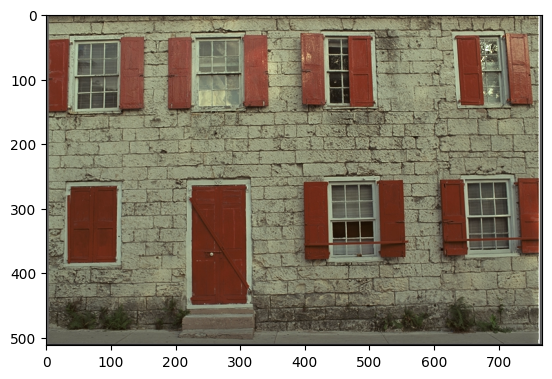

In [39]:
import cv2
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

def load_img(path: str) -> NDArray:
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

images = [load_img("data/kodim01.png")]
img = images[0]
print(type(img))
w, h, _ = img.shape
vec = np.reshape(images[0], (-1, 3))
print(vec.shape)

avg = np.average(vec, axis=0)
centered = vec - avg
print(centered.shape)
# cov = np.average( np.dot((vec - avg),(vec - avg).T), axis=0)

print(avg)
cov = np.cov(centered.T)
print(f"Covariance matrix: {cov}")
back = np.reshape(vec, (w, h, 3))
print(back.shape)
plt.imshow(back)
plt.show()